[gitpod](https://freecodecam-boilerplate-bx60msmpksy.ws-us121.gitpod.io/)

In [46]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [47]:
file_path = os.path.join('/','home','jovyan','work','src','data','medical_examination.csv')

if not os.path.exists(file_path):
  raise FileNotFoundError(f"file not found :: {file_path}")


df = pd.read_csv(file_path, index_col='id')
df.describe()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
overweight_s = df["weight"] / (df["height"] / 100) ** 2

df_w_overweight = df.assign(
    overweight=np.where(overweight_s > 25, 1, 0),
)

df_w_overweight['overweight'].value_counts()

overweight
1    43546
0    26454
Name: count, dtype: int64

In [49]:
df_w_overweight['cholesterol'] = np.where(df['cholesterol'] > 1, 1, 0)
df_w_overweight['gluc'] = np.where(df['gluc'] > 1, 1, 0)

In [50]:
df_cat = pd.melt(
    df_w_overweight,
    id_vars=["cardio"],
    value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"],
    var_name="variable",
    value_name="value"
    )

In [51]:
df_grouped = df_cat.groupby(["cardio", "variable", "value"]).size().reset_index(name="total")

df_grouped.head()

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330


[]

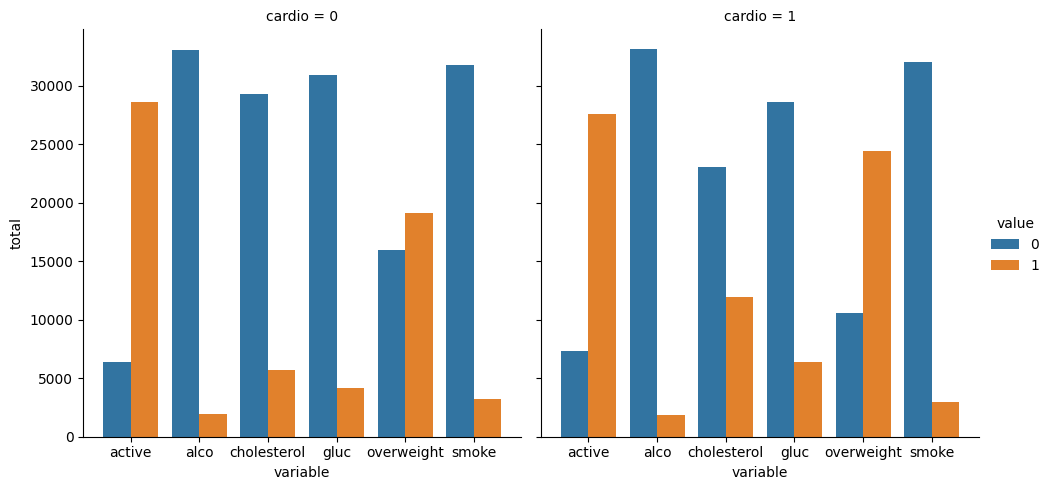

In [52]:

sns.catplot(
data=df_grouped,
x="variable",
y="total",
hue="value",
col="cardio",
kind="bar"
)

plt.plot()